# LetsGrowMore- Virtual Internship Program (VIP) 

### TASK 2: Prediction using Desicion Tree Alogorithm.

**Submitted by** : Supriya Raturi

**Batch** : December 2021

**Level** : Intermediate

**Probelm Statement:** To create the Decision Tree classifier using IRIS data and visualize it graphically.

In [58]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from yellowbrick.classifier import ROCAUC

In [59]:
# Loading the iris data from seaborn
df1 = sns.load_dataset('iris')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
# Shape of the data
df1.shape

(150, 5)

In [61]:
# Informational Summary
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Inference:**
* There are 5 features in the dataframe out of which 4 are float type and 1 is object type.   

In [62]:
# Decriptive summary
df1.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.057333,0.435866,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.199333,0.762238,0.1,0.3,1.3,1.8,2.5
species,150,3,setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Inference:**

On comparing median and median we found out:
* Sepal length and sepal width are normally distributed.
* petal length and petal width are skewed. 

<AxesSubplot:>

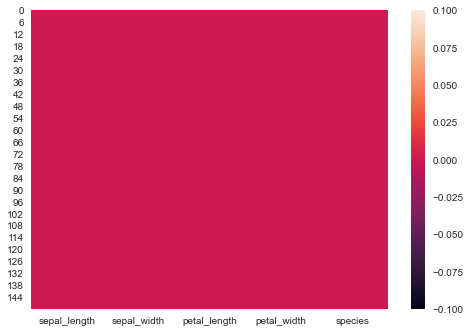

In [63]:
# Checking for null values
sns.heatmap(df1.isnull())

**Inference:**
* There are no nulls in the data.

In [64]:
# Value counts in the target column ~ 'SPECIES'
df1['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

**Inference:**
* There are 3 categories in the target column and all have same frequency i.e. 50

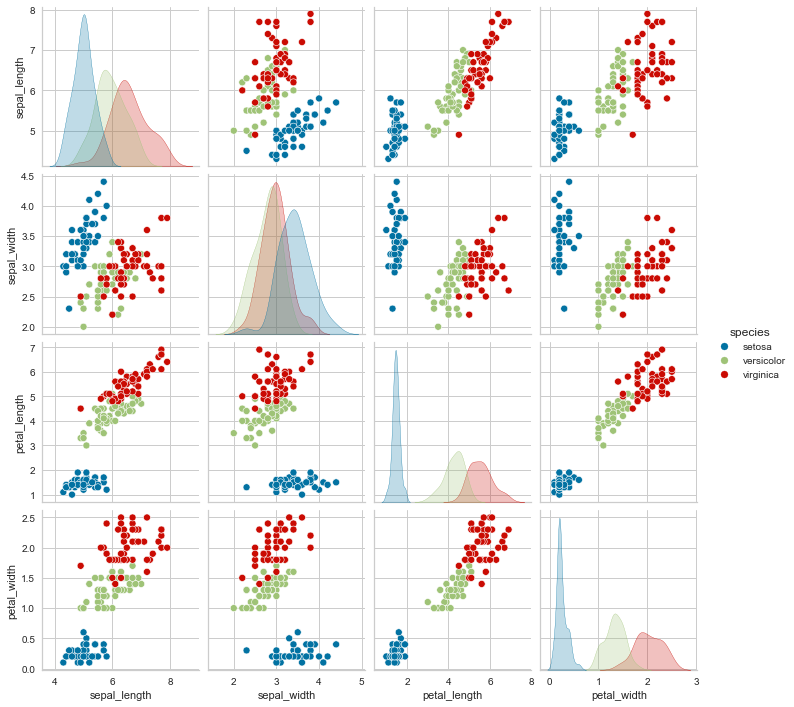

In [75]:
# Pairplot
sns.pairplot(df1,diag_kind='kde',hue='species')

**Inference:**
* From the scatterplot we can see that SETOSA can be easily identified from the 3 species as it has smaller petal width and petal length also smaller sepal length and greater sepal width.
* Versicolor and Virgina are bit tricky to identify as they have similar sepal width and sepal length.

In [65]:
# Standarizing the data before model bulding.

SS = StandardScaler()

# creating a new dataframe with only numerical features
df_num = df1.select_dtypes(include = np.number)

# Creating a new dataframe with scaled numerical features
df2 = pd.DataFrame(SS.fit_transform(df_num),columns = df_num.columns)
df2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [66]:
# Concatinating target column with the scaled features.
df2 = pd.concat([df2,df1['species']],axis=1)
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


### Model Building

In [67]:
# Splitting the data into train and test.
X = df2.drop('species',axis=1)
y = df2['species']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [68]:
# Model building
dt = DecisionTreeClassifier()

dt_model = dt.fit(X_train,y_train)
y_pred = dt_model.predict(X_test)

In [69]:
# Accuracy of the model
acc = accuracy_score(y_test,y_pred)
print('Accuracy of the model: ', acc)

Accuracy of the model:  0.9555555555555556


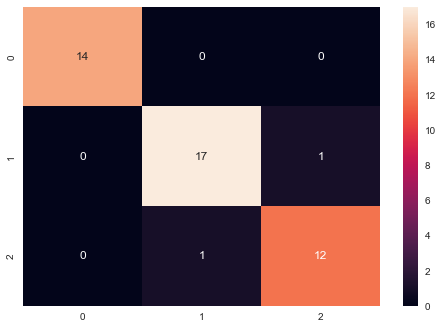

In [70]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot= True);

In [71]:
# Classification report
rep = classification_report(y_test,y_pred)
print(rep)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.94      0.94      0.94        18
   virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



**Inference:**
* Looking at confusion matrix and classification report we can see that our machine is able to predict 'SETOSA' perfectly where as there are very few miss-clasification in VERSICOLOR and VIRGINICA.

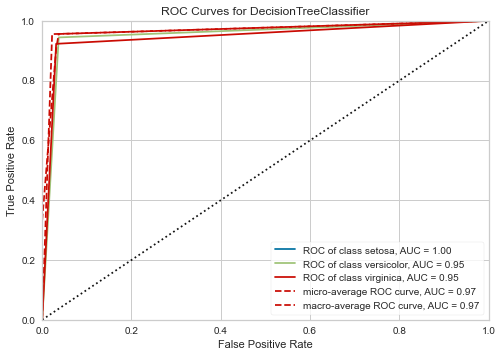

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [72]:
# Plotting the ROC curve for all 3 classes

oz = ROCAUC(dt)
                                                                             
oz.fit(X_test, y_test)
oz.score(X_test, y_test)

oz.show()

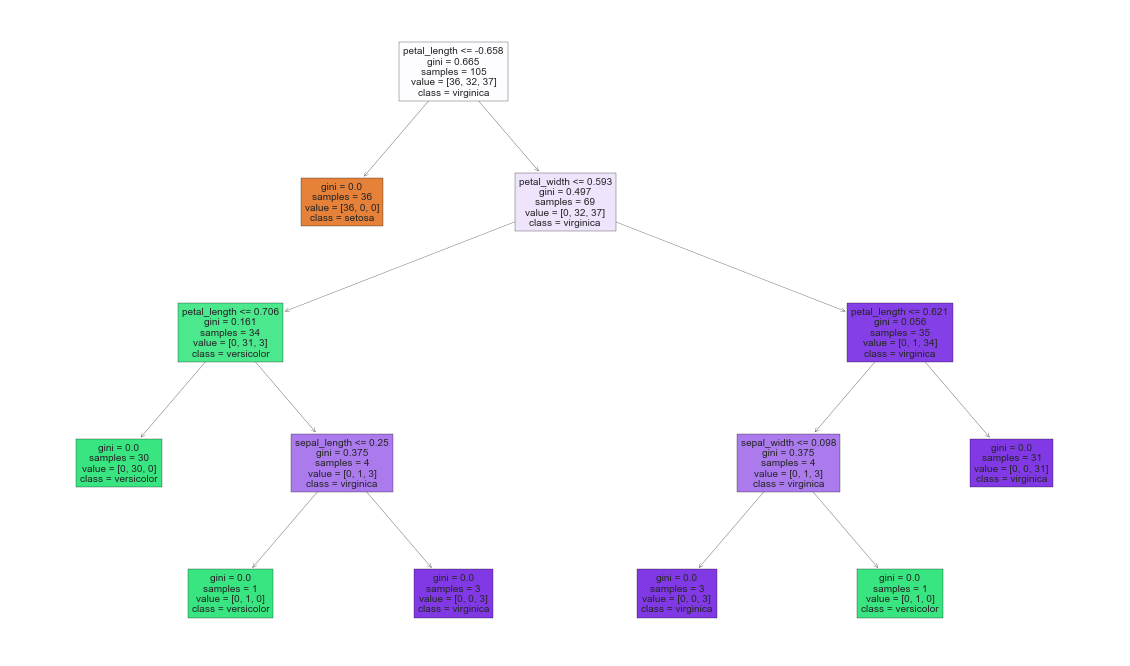

In [73]:
# Plotting the decision tree
plt.figure(figsize=(20,12))
plot_tree(dt,feature_names= X.columns,fontsize=10,filled=True,class_names= ['setosa', 'versicolor', 'virginica']);

**CONCLUSION:**
* We have sucessfully build our model using Decision tree classifier which will be able to predict any new data with an accuracy of 95.5%

### THE END!